In [1]:
from data import DInterface

C:\Users\gongshuicheng\.conda\envs\pytorch-cpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = DInterface(dataset="original_data", batch_size=8)


In [3]:
from model import MInterface

In [4]:
model = MInterface(
    model_name="repmet_mobilenetv2",
    loss="repmet_loss",
    lr=0.001
)

Using cache found in C:\Users\gongshuicheng/.cache\torch\hub\pytorch_vision_v0.10.0


In [20]:
%reload_ext tensorboard
%tensorboard --logdir=lightning_logs/

Reusing TensorBoard on port 6006 (pid 4076), started 6:18:49 ago. (Use '!kill 4076' to kill it.)

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split


annotation_df = pd.read_csv(os.path.join('./data/datasets/original_data', "annotations.csv"))
labels = annotation_df.iloc[:, 1]
train_set, val_set = train_test_split(annotation_df, test_size=0.2, random_state=0, stratify=labels)

In [29]:
train_set

,0000.jpg,0
633,0634.jpg,2
324,0325.jpg,2
582,0583.jpg,2
579,0580.jpg,2
390,0391.jpg,2
...,...,...
38,0039.jpg,0
96,0097.jpg,1
327,0328.jpg,2
275,0276.jpg,2


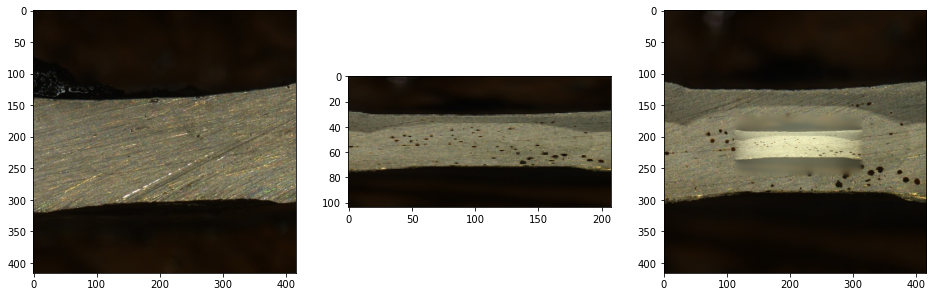

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as T

data_dir = "./data/datasets/original_data"
img_name0 = train_set.iloc[0, 0]
img_name1 = train_set.iloc[95, 0]
import cv2

img0 = cv2.imread(os.path.join(data_dir, img_name0))[..., ::-1]
img1 = cv2.imread(os.path.join(data_dir, img_name1))[..., ::-1]

img1_resize = cv2.resize(img1, (208, 104))

plt.rcParams["figure.figsize"] = [16, 16]

plt.subplot(1, 3, 1)
plt.imshow(img0)
plt.subplot(1, 3, 2)
plt.imshow(img1_resize)

mask = np.ones((img1_resize.shape[0], img1_resize.shape[1]))
mask_inner = mask[1:-1, 1:-1]
mask = cv2.copyMakeBorder(mask_inner, 1, 1, 1, 1, cv2.BORDER_ISOLATED | cv2.BORDER_CONSTANT, value=0)

mask *= 255

p = (213, 213)
out_img = cv2.seamlessClone(img1_resize.astype(np.uint8), img1.astype(np.uint8), mask.astype(np.uint8), p, cv2.NORMAL_CLONE)

plt.subplot(1, 3, 3)
plt.imshow(out_img)



In [12]:
val_set

,0000.jpg,0
67,0068.jpg,0
1041,1042.jpg,2
338,0339.jpg,2
1062,1063.jpg,2
1023,1024.jpg,2
...,...,...
216,0217.jpg,2
947,0948.jpg,2
1028,1029.jpg,2
76,0077.jpg,0


In [16]:
print(len(train_set))
print(len(val_set))
pr
print(train_set.iloc[:, 1].value_counts(ascending=True) / len(train_set))
print(val_set.iloc[:, 1].value_counts(ascending=True) / len(val_set))


857
215
1    0.024504
0    0.074679
2    0.900817
Name: 0, dtype: float64
1    0.023256
0    0.074419
2    0.902326
Name: 0, dtype: float64


In [17]:
857 % 8

1

In [22]:
int("5-fold".split("-")[0])

5

In [10]:
import cv2
import numpy as np
def video_demo():
    capture0 = cv2.VideoCapture(0) #0为电脑内置摄像头
    capture1 = cv2.VideoCapture(0)
    while(True):
        ret0, frame0 = capture0.read()#摄像头读取,ret为是否成功打开摄像头,true,false。 frame为视频的每一帧图像
        ret1, frame1 = capture1.read()
        frame = np.concatenate((frame0, frame1), axis=1)
        cv2.imshow("video", frame)
        c = cv2.waitKey(50)
        if c == 'q':
            break
            
video_demo()
cv2.destroyAllWindows()


ValueError: zero-dimensional arrays cannot be concatenated

In [3]:
import torch
y = torch.arange(0, 6, 2)
x = torch.arange(6, 10, 2)

In [13]:
shift_y, shift_x = torch.meshgrid(y, x)
print(shift_x)
print(shift_y)

tensor([[6, 8],
        [6, 8],
        [6, 8]])
tensor([[0, 0],
        [2, 2],
        [4, 4]])


In [14]:
shift_x.ravel()

tensor([6, 8, 6, 8, 6, 8])

In [15]:
shift_y.ravel()

tensor([0, 0, 2, 2, 4, 4])

In [16]:
shift = torch.stack(
            (shift_y.ravel(), shift_x.ravel(),
             shift_y.ravel(), shift_x.ravel()),
            axis=1
)

In [17]:
print(shift)
print(shift.shape)

tensor([[0, 6, 0, 6],
        [0, 8, 0, 8],
        [2, 6, 2, 6],
        [2, 8, 2, 8],
        [4, 6, 4, 6],
        [4, 8, 4, 8]])
torch.Size([6, 4])


In [7]:
import torch
from model.model_utils import bbox_iou

anchors = torch.tensor([[0, 0, 3, 3], [1, 1, 4, 4]])
gt_bboxes = torch.tensor([[1, 1, 2, 2], [2, 3, 4, 4]])

IoUs = bbox_iou(anchors, gt_bboxes)  # (n_cells * n_anchors) x N_gt
argmax_IoUs = IoUs.argmax(axis=1)  # Argmax for each anchor
max_IoUs = IoUs[torch.arange(IoUs.shape[0]), argmax_IoUs]
gt_argmax_IoUs = IoUs.argmax(axis=0)  # Argmax for each ground truth
gt_max_IoUs = IoUs[gt_argmax_IoUs, torch.arange(IoUs.shape[1])]

In [9]:
print(IoUs)
print(argmax_IoUs)
print(max_IoUs)
print(gt_argmax_IoUs)
print(gt_max_IoUs)

tensor([[0.1111, 0.0000],
        [0.1111, 0.2222]])
tensor([0, 1])
tensor([0.1111, 0.2222])
tensor([0, 1])
tensor([0.1111, 0.2222])


In [12]:
print(IoUs == gt_max_IoUs)

tensor([[ True, False],
        [ True,  True]])


In [11]:
torch.where(IoUs == gt_max_IoUs)

(tensor([0, 1, 1]), tensor([0, 0, 1]))

In [19]:
torch.randperm(100)[:102].shape

torch.Size([100])

# Test Model

## Test Faster R-CNN Sub Module

In [ ]:
from model.fasetr_rcnn import AnchorTargetCreator, RegionProposalNetwork, FasterRcnn, ProposalCreator, ProposalTargetCreator

from torchvision.models import vgg16


extractor = vgg16(pretrained=True).features[:-1]

test_sub_module = "anchor_target_creator"

from data.data_interface import DInterface

dataset = DInterface(data_dir=r'./test_data/')
dataset.setup(stage="fit")
img, gt_bboxes, gt_labels, diffs, scale = dataset.train_set[0]
img_size = img.shape[1:]
img = img.unsqueeze(0)  # Simulate one batch with batch size 1
# H, W of the original image

if test_sub_module == "extractor":
    # For 000005.jpg
    print(f"Scale is {scale}")  # 1.6
    print(img.shape)  # (3, 600, 800)
    output = extractor(img)
    print(output.shape)  # (512, 37, 50)
elif test_sub_module == "rpn":  # Include Proposal Creator
    rpn = RegionProposalNetwork()
    features = extractor(img)
    rpn_locs, rpn_scores, rois, roi_idx, shifted_anchors = rpn(features, img_size, scale)
    print(rpn.anchor_base)
elif test_sub_module == "anchor_target_creator":
    rpn = RegionProposalNetwork()
    features = extractor(img)
    rpn_locs, rpn_scores, rois, roi_idx, shifted_anchors = rpn(features, img_size, scale)
    atc = AnchorTargetCreator()
    gt_locs, created_labels = atc(gt_bboxes, shifted_anchors, img_size)
    print(gt_locs, created_labels)

elif test_sub_module == "proposal_target_creator":
    rpn = RegionProposalNetwork()
    features = extractor(img)
    rpn_locs, rpn_scores, RoIs, RoI_idx, shifted_anchors = rpn(features, img_size, scale)
    ptc = ProposalTargetCreator()
    RoI_samples, gt_RoI_locs, gt_RoI_labels = ptc(RoIs, gt_bboxes, gt_labels)
    print(RoI_samples, gt_RoI_locs, gt_RoI_labels)

elif test_sub_module == "faster_rcnn":
    rpn = RegionProposalNetwork()
    head = None
    faster_rcnn = FasterRcnn(extractor, rpn, head)

elif test_sub_module == "ProposalCreator":
    # Use a model to generate locs, scores, anchors
    parent_model = None
    proposal_creator = ProposalCreator(parent_model=parent_model)

In [1]:
import torch
torch.tensor([[1, 2, 3], [4, 5]])

/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: expected sequence of length 3 at dim 1 (got 2)

In [3]:
!kill 4955

In [5]:
%reload_ext tensorboard
%tensorboard --logdir=lightning_logs/

Reusing TensorBoard on port 6006 (pid 16982), started 0:07:46 ago. (Use '!kill 16982' to kill it.)

Reusing TensorBoard on port 6006 (pid 22869), started 0:00:15 ago. (Use '!kill 22869' to kill it.)